In [4]:
# data => Social_Network_Ads.csv
# location => https://mitu.co.in/dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [10]:
df.shape

(400, 5)

In [13]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
x = df[['Age', 'EstimatedSalary']]  # input data

y = df['Purchased']   # output data

In [25]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


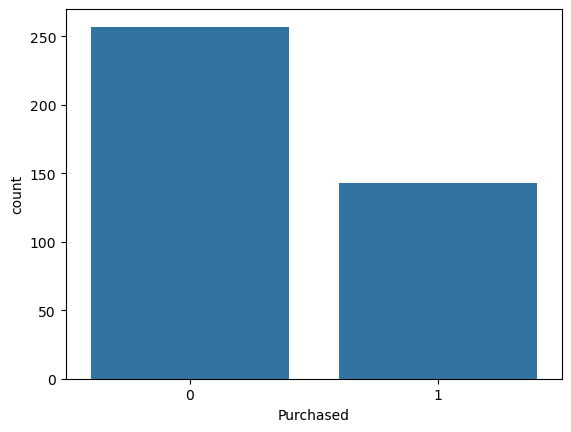

In [27]:
sns.countplot(x = y);

In [29]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

### visualize the data

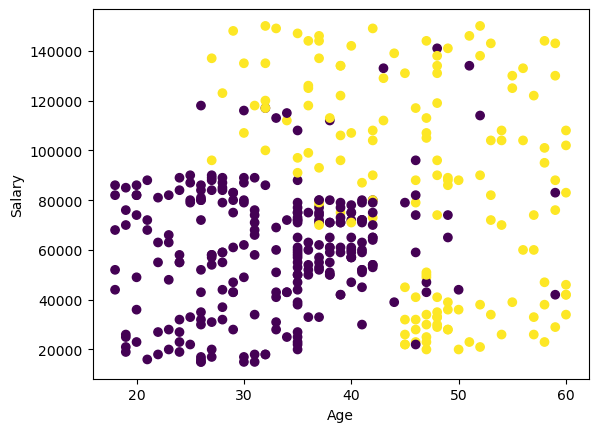

In [32]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(df['Age'], df['EstimatedSalary'], c = df['Purchased']);

In [34]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


#### Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [39]:
x_scaled

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

#### cross validation

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [46]:
x_train.shape

(300, 2)

In [48]:
y_train.shape

(300,)

#### Build the model

In [51]:
# import the class
from sklearn.linear_model import LogisticRegression

In [53]:
# create an object
log = LogisticRegression()

In [55]:
log.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [58]:
# predict on test data
y_pred = log.predict(x_test)

In [60]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [62]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


#### Confusion Matrix

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

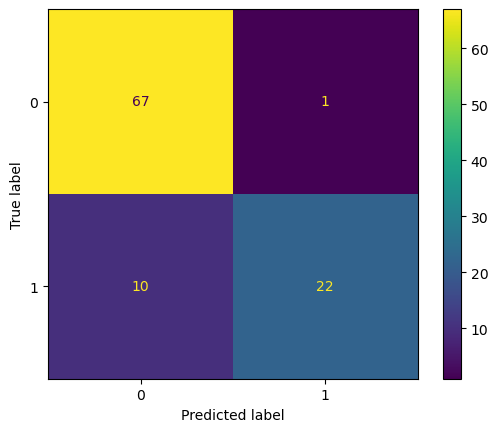

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [69]:
# classification report

In [71]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [79]:
# actual accuracy / accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

#### prediction

In [83]:
val = [[26, 78000]]

In [87]:
log.predict(scaler.transform(val))

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])